In [1]:
import pandas as pd, seaborn as sns,numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,plot_confusion_matrix,precision_score, recall_score, f1_score

In [2]:
dataset = pd.read_csv('Bank_CreditScoring.csv')
dataset

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461,15,no,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,1,10895,1388015,15256,Reject,7
2346,6,Fresh_Graduate,690944,13,yes,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,3,11971,1147984,11842,Accept,7
2347,6,Fresh_Graduate,321921,13,no,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,1,4175,685580,16619,Accept,7
2348,6,Fresh_Graduate,393555,14,yes,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,2,5011,673748,13892,Reject,7


In [3]:
dataset.dtypes

Credit_Card_Exceed_Months             int64
Employment_Type                      object
Loan_Amount                           int64
Loan_Tenure_Year                      int64
More_Than_One_Products               object
Credit_Card_More_Than_Months          int64
Number_of_Dependents                  int64
Years_to_Financial_Freedom            int64
Number_of_Credit_Card_Facility        int64
Number_of_Properties                  int64
Number_of_Bank_Products               int64
Number_of_Loan_to_Approve             int64
Property_Type                        object
Years_for_Property_to_Completion      int64
State                                object
Number_of_Side_Income                 int64
Monthly_Salary                        int64
Total_Sum_of_Loan                     int64
Total_Income_for_Join_Application     int64
Decision                             object
Score                                 int64
dtype: object

# Correction of the dataset

In [3]:
# Correction of the dataset
print('Before correction:',np.unique(dataset['State']))

dataset.loc[dataset['State'] == 'Johor B', 'State'] = 'Johor'
dataset.loc[dataset['State'] == 'K.L', 'State'] = 'Kuala Lumpur'
dataset.loc[dataset['State'] == 'N.S', 'State'] = 'N.Sembilan'
dataset.loc[dataset['State'] == 'P.Pinang', 'State'] = 'Pulau Penang'
dataset.loc[dataset['State'] == 'Penang', 'State'] = 'Pulau Penang'
dataset.loc[dataset['State'] == 'SWK', 'State'] = 'Sarawak'
dataset.loc[dataset['State'] == 'Trengganu', 'State'] = 'Terengganu'

print()
print('After correction:',np.unique(dataset['State']))

Before correction: ['Johor' 'Johor B' 'K.L' 'Kedah' 'Kuala Lumpur' 'N.S' 'N.Sembilan'
 'P.Pinang' 'Penang' 'Pulau Penang' 'SWK' 'Sabah' 'Sarawak' 'Selangor'
 'Trengganu']

After correction: ['Johor' 'Kedah' 'Kuala Lumpur' 'N.Sembilan' 'Pulau Penang' 'Sabah'
 'Sarawak' 'Selangor' 'Terengganu']


# Description of the dataset

In [5]:
dataset.isnull().sum()

Credit_Card_Exceed_Months            0
Employment_Type                      0
Loan_Amount                          0
Loan_Tenure_Year                     0
More_Than_One_Products               0
Credit_Card_More_Than_Months         0
Number_of_Dependents                 0
Years_to_Financial_Freedom           0
Number_of_Credit_Card_Facility       0
Number_of_Properties                 0
Number_of_Bank_Products              0
Number_of_Loan_to_Approve            0
Property_Type                        0
Years_for_Property_to_Completion     0
State                                0
Number_of_Side_Income                0
Monthly_Salary                       0
Total_Sum_of_Loan                    0
Total_Income_for_Join_Application    0
Decision                             0
Score                                0
dtype: int64

In [6]:
dataset.describe()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,2350.000000,2350.000000,2350.000000,2350.00000,2350.00000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000
mean,4.723404,448350.120851,17.053191,2.12766,3.12766,13.382979,3.744681,2.382979,2.106383,1.991915,10.659574,2.020426,7972.040000,9.435756e+05,13767.859574,7.496596
std,2.101127,202814.886797,4.352123,1.40874,1.40874,4.067090,1.391271,0.813707,1.533423,0.816717,1.077590,0.818325,2588.330436,2.909033e+05,3591.707735,1.112542
min,1.000000,100194.000000,10.000000,1.00000,2.00000,5.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000,6.000000
25%,3.000000,273169.250000,13.000000,1.00000,2.00000,10.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,5737.750000,7.007870e+05,10751.500000,6.000000
50%,5.000000,447251.500000,17.000000,1.00000,2.00000,14.000000,4.000000,2.000000,1.000000,2.000000,10.000000,2.000000,7982.500000,9.375275e+05,13689.500000,8.000000
75%,7.000000,623714.000000,21.000000,3.00000,4.00000,17.000000,5.000000,2.000000,3.000000,3.000000,11.000000,3.000000,10227.750000,1.197191e+06,16916.250000,8.000000
max,7.000000,799628.000000,24.000000,5.00000,6.00000,19.000000,6.000000,5.000000,5.000000,3.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000,9.000000


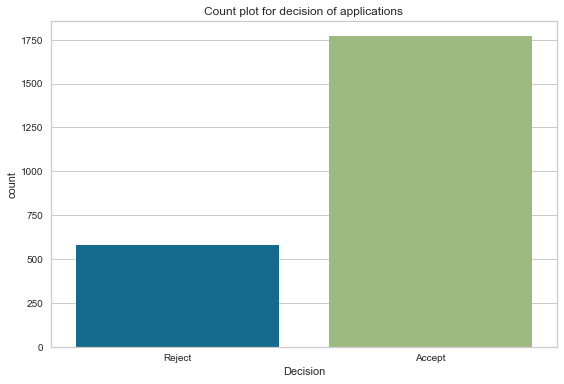

In [7]:
# Count plot for decision of applications

decision_count = sns.countplot(x="Decision", data=dataset)

decision_count.set_title("Count plot for decision of applications")

plt.tight_layout()
# plt.savefig('images/q2/EDA/questions/gender_counts.png')
plt.show()

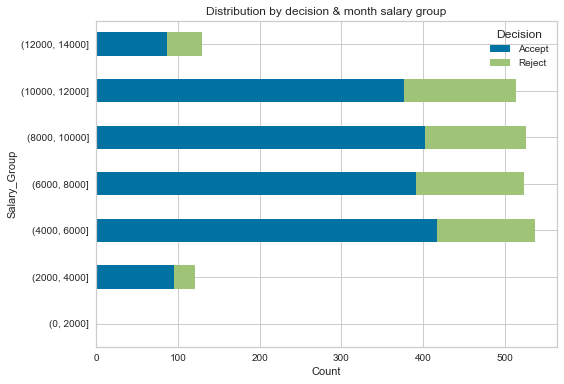

In [8]:
# Distribution by decision & month salary group
analysis = dataset.copy()
analysis['Salary_Group'] = pd.cut(analysis['Monthly_Salary'],bins = np.arange(0,16000,2000))

dist = analysis.groupby(['Salary_Group', 'Decision'])['Decision'].count()
dist = dist.unstack('Decision')
dist_plot = dist.plot(kind='barh',stacked=True)

dist_plot.set_title("Distribution by decision & month salary group")
dist_plot.set(xlabel='Count', ylabel='Salary_Group')

plt.tight_layout()
plt.show()

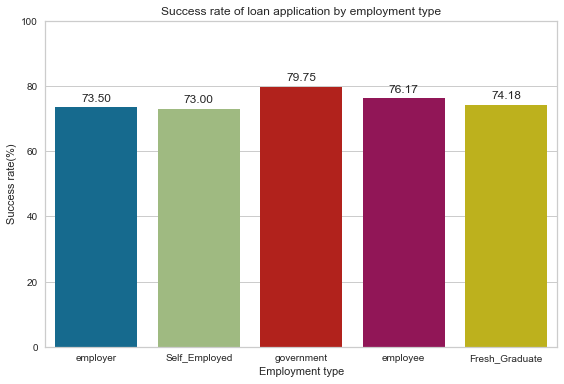

In [9]:
# Percentage of each employment type get accepted

employment_list = []
success_rate_list = []
employment_Type = pd.unique(dataset['Employment_Type'].values)

for employment in employment_Type:
    current = dataset[dataset['Employment_Type'] == employment]
    total_application = sum(current['Decision'].value_counts())
    accept = current['Decision'].value_counts()[0]/total_application
    
    employment_list.append(employment)
    success_rate_list.append(round(accept*100,2))
    
success = sns.barplot(x=employment_list,y=success_rate_list)
success.set_title("Success rate of loan application by employment type")
success.set(xlabel='Employment type', ylabel='Success rate(%)')
success.set(ylim=(0, 100))
for p in success.patches:
    success.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center',
                     va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

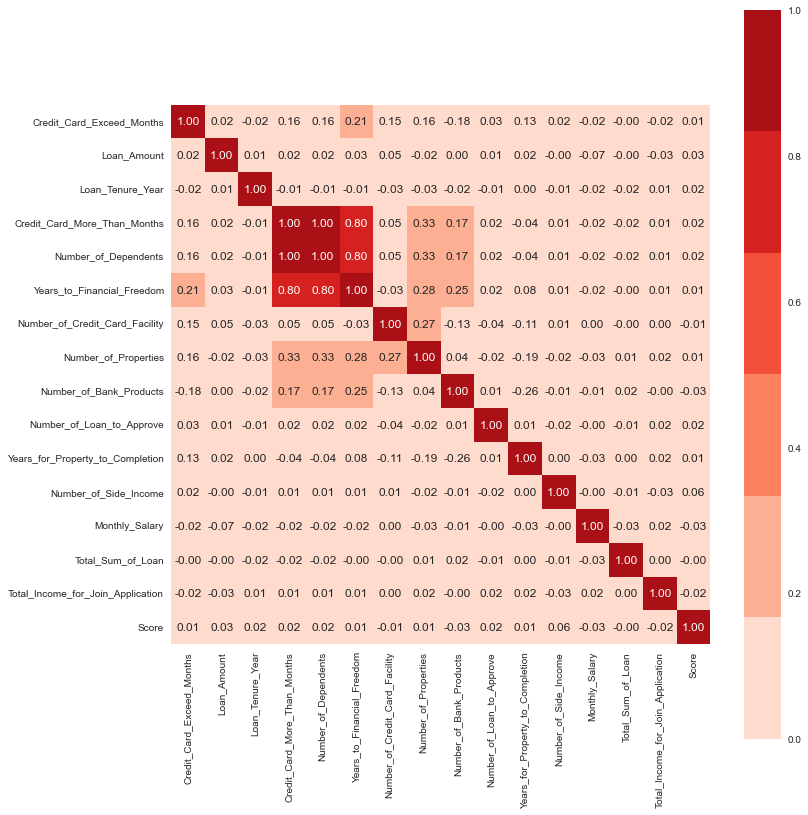

In [10]:
# Correlation between Loan_Amount and some other variables
cor = dataset.corr()

plt.figure(figsize=(12,12))
correlation_plot = sns.heatmap(cor,annot=True,fmt='.2f', vmin=0, vmax=1.0, square=True, cmap=sns.color_palette('Reds'))
plt.tight_layout()
plt.show()

# Model Construction and Assessment

Clustering analysis

In [14]:
def km_select_best_k():
    # line very smooth, unclear
    km = KMeans()
    visualizer = KElbowVisualizer(km, k=(2,12),timing=False,locate_elbow=False)
    visualizer.fit(X)        # Fit the data to the visualizer
    plt.title('Distortion Score Elbow for KMeans Clustering')
    plt.savefig('km_distortion.png')
    visualizer.show()
    
    km = KMeans()
    visualizer = KElbowVisualizer(km, k=(2,12),timing=False,metric='silhouette')
    visualizer.fit(X)        # Fit the data to the visualizer
    plt.title('Silhouette Score Elbow for KMeans Clustering')
    plt.savefig('km_silhouette.png')
    visualizer.show()
    k_value = visualizer.elbow_value_
    
    km = KMeans(n_clusters=k_value)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    plt.title('Silhouette Plot of KMeans Clustering for 2350 Samples in 2 Centers')
    plt.savefig('km_silhouette_visualizer.png')
    visualizer.show()
    
    return k_value

In [15]:
dataset_cluster = dataset.copy()

# split x and y
X = dataset_cluster.drop('Decision', axis=1)
y = dataset_cluster['Decision'].map({'Accept': 1, 'Reject': 0})

# encode object columns
X = pd.get_dummies(X)

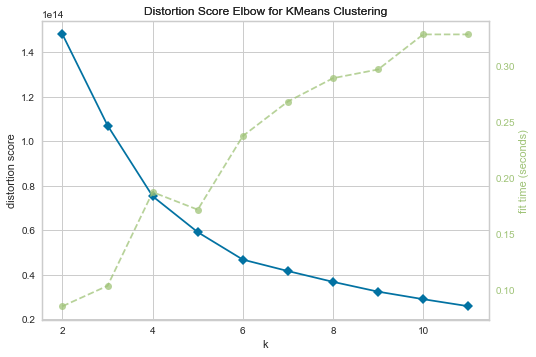

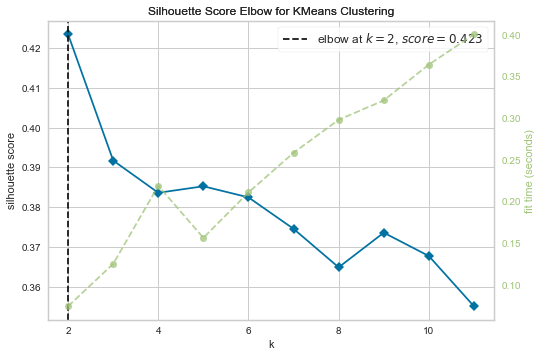

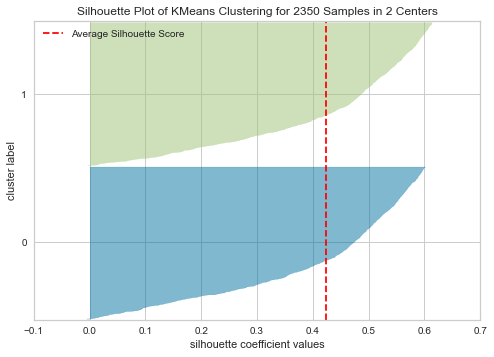

In [16]:
km_k = km_select_best_k()

In [17]:
km = KMeans(n_clusters=km_k)
km.fit(X, y)

df_new = dataset_cluster.copy()
df_new = df_new.drop("Decision", axis=1)
df_new['Decision']=km.labels_

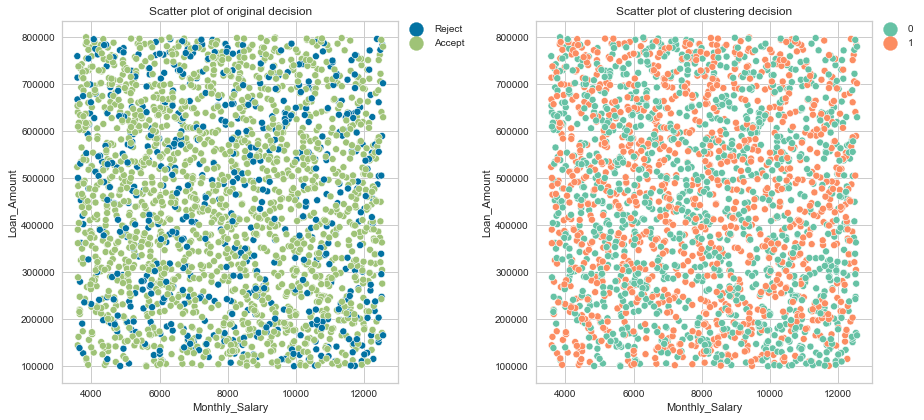

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

a = sns.scatterplot(x="Monthly_Salary", y="Loan_Amount", hue="Decision", data=dataset_cluster, ax=axes[0])
b = sns.scatterplot(x="Monthly_Salary", y="Loan_Amount", hue="Decision", data=df_new, ax=axes[1],palette='Set2')
a.legend(loc='upper left',bbox_to_anchor=(1.01, 1),borderaxespad=0,markerscale=2)
a.set_title('Scatter plot of original decision')
b.legend(loc='upper left',bbox_to_anchor=(1.01, 1),borderaxespad=0,markerscale=2)
b.set_title('Scatter plot of clustering decision')
plt.tight_layout()
plt.savefig('km_result.png')
plt.show()

Classification model

In [34]:
def rf_select_best_depth():
    scores = []
    max_score = counter = depth_counter = 0

    while True:
        depth_counter += 1
        rf = RandomForestClassifier(max_depth=depth_counter)
        rf.fit(X_train, y_train)
        score = rf.score(X_test,y_test)*100
        scores.append(score)

        if score > max_score+0.02:
            max_score = score
            counter = 0
        elif counter < 10:
            counter += 1
        else:
            break

    print('Best depth:',np.argmax(scores)+1)
    print('Best accuracy:',format(max(scores),'.2f'))

    depth_range = range(1,depth_counter+1)
    plt.figure()
    plt.xlabel('depth')
    plt.ylabel('accuracy')
    plt.title('Accuracy by max_depth')
    plt.scatter(depth_range, scores,color='blue')
    plt.scatter([np.argmax(scores)+1], [max(scores)],color='red')##
    
    plt.annotate(np.argmax(scores)+1, (np.argmax(scores)+1, max(scores)))
    
    plt.xticks(np.arange(1,depth_counter,5));
    plt.plot(depth_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
    plt.tight_layout()
    plt.savefig('rf_depth.png')
    plt.show()

    return np.argmax(scores)+1

def rf_select_best_criterion(depth):
    criterion = ['gini','entropy']
    scores = []
    
    for c in criterion:
        rf = RandomForestClassifier(max_depth=depth,criterion=c)
        rf.fit(X_train, y_train)
        score = rf.score(X_test,y_test)*100
        scores.append(score)

    print('Best criterion:',criterion[np.argmax(scores)])
    print('Best accuracy:',format(max(scores),'.2f'))
    
    acc = sns.barplot(x=criterion,y=scores)
    acc.set_title("Accuracy by criterion")
    acc.set(xlabel='Criterion', ylabel='Accuracy')
    acc.set(ylim=(0, 100))
    for p in acc.patches:
        acc.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center',
                         va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')
    plt.tight_layout()
    plt.savefig('rf_criterion.png')
    plt.show()

    return criterion[np.argmax(scores)]

def rf_select_best_n(depth,criterion):
    scores = []
    max_score = counter = 0
    n_counter = 50

    while True:
        rf = RandomForestClassifier(max_depth=depth,criterion=criterion,n_estimators=n_counter)
        rf.fit(X_train, y_train)
        score = rf.score(X_test,y_test)*100
        scores.append(score)
        n_counter += 10
        
        if score > max_score+0.02:
            max_score = score
            counter = 0
        elif counter < 10:
            counter += 1
        else:
            break

    print('Best n:',range(50,n_counter+1,10)[np.argmax(scores)])
    print('Best accuracy:',max(scores))

    n_range = range(50,n_counter,10)
    
    plt.figure()
    plt.xlabel('depth')
    plt.ylabel('accuracy')
    plt.title('Accuracy by max_depth')
    plt.scatter(n_range, scores,color='blue')
    plt.scatter([range(50,n_counter+1,10)[np.argmax(scores)]], [max(scores)],color='red')
    
    plt.annotate(range(50,n_counter+1,10)[np.argmax(scores)], (range(50,n_counter+1,10)[np.argmax(scores)], max(scores)))
    
    plt.xticks(np.arange(50,n_counter,50));
    plt.plot(n_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
    plt.tight_layout()
    plt.savefig('rf_n.png')
    plt.show()

    return range(50,n_counter,10)[np.argmax(scores)]

def svc_select_best_kernel():
    kernel = ['linear', 'poly', 'rbf', 'sigmoid']
    scores = []
    
    for k in kernel:
        svc = SVC(probability=True,kernel=k)
        svc.fit(X_train, y_train)
        score = svc.score(X_test,y_test)*100
        scores.append(score)

    print('Best kernel:',kernel[np.argmax(scores)])
    print('Best accuracy:',format(max(scores),'.2f'))
    
    acc = sns.barplot(x=kernel,y=scores)
    acc.set_title("Accuracy by kernel")
    acc.set(xlabel='Kernel', ylabel='Accuracy')
    acc.set(ylim=(0, 100))
    for p in acc.patches:
        acc.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center',
                         va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')
    plt.tight_layout()
    plt.savefig('svm_kernel.png')
    plt.show()

    return kernel[np.argmax(scores)]

def svc_select_best_gamma(kernel):
    gamma = ['scale', 'auto']
    scores = []
    
    for g in gamma:
        svc = SVC(probability=True,kernel=kernel,gamma=g)
        svc.fit(X_train, y_train)
        score = svc.score(X_test,y_test)*100
        scores.append(score)

    print('Best kernel:',gamma[np.argmax(scores)])
    print('Best accuracy:',format(max(scores),'.2f'))
    
    acc = sns.barplot(x=gamma,y=scores)
    acc.set_title("Accuracy by gamma")
    acc.set(xlabel='Gamma', ylabel='Accuracy')
    acc.set(ylim=(0, 100))
    for p in acc.patches:
        acc.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center',
                         va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')
    plt.tight_layout()
    plt.savefig('svm_gamma.png')
    plt.show()

    return gamma[np.argmax(scores)]

def svc_select_best_degree(kernel,gamma):
    scores = []
    max_score = counter = 0
    degree_counter = 3

    while True:
        svc = SVC(kernel=kernel,gamma=gamma,degree=degree_counter)
        svc.fit(X_train, y_train)
        score = svc.score(X_test,y_test)*100
        scores.append(score)
        degree_counter += 1

        if degree_counter > 20:
            break

    print('Best degree:',np.argmax(scores)+3)
    print('Best accuracy:',format(max(scores),'.2f'))

    degree_range = range(3,degree_counter)
    
    plt.figure()
    plt.xlabel('Degree')
    plt.ylabel('Accuracy')
    plt.title('Accuracy by degree')
    plt.scatter(degree_range, scores,color='blue')
    plt.scatter([np.argmax(scores)+3], [max(scores)],color='red')
    
    plt.annotate(np.argmax(scores)+3, (np.argmax(scores)+3, max(scores)))
    
    plt.xticks(np.arange(3,degree_counter+1));
    plt.plot(degree_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
    plt.tight_layout()
    plt.savefig('svm_degree.png')
    plt.show()

    return np.argmax(scores)+3

def evaluate_and_plot(model_list):
    fig, ax = plt.subplots(figsize = (15, 6),nrows=1, ncols=2)
    
    # bar graph
    plt.subplot(121)
    model_type = []
    value = []
    aspect = []
    prob_list = []
    model_name = ['SVC','RF']
        
    for i,model in enumerate(model_list):
        model_type.append(model_name[i])
        value.append(model.score(X_test, y_test))
        aspect.append('Accuracy')
        
        model_type.append(model_name[i])
        prob = model.predict_proba(X_test)[:,1]
        value.append(roc_auc_score(y_test, prob))
        prob_list.append(prob)
        aspect.append('AUC')
        
        y_pred = model.predict(X_test)
        
        model_type.append(model_name[i])
        value.append(precision_score(y_test, y_pred))
        aspect.append('Precision')
        
        model_type.append(model_name[i])
        value.append(recall_score(y_test, y_pred))
        aspect.append('Recall')
        
        model_type.append(model_name[i])
        value.append(f1_score(y_test, y_pred))
        aspect.append('F1')
        
    data = {"Model_type": model_type,
            "Value": [val * 100 for val in value],
            "Aspect": aspect}
    df = pd.DataFrame(data)
    
    graph = sns.barplot(x="Aspect",
                        y="Value",
                        hue="Model_type",
                        data=df,
                        ax=ax[0])
    graph.set_title("Statistics of Different Models")
    graph.legend()
    graph.set(ylim=(0, 110))
    for bar in graph.patches:
        graph.annotate(format(bar.get_height(), '.2f'),
                         (bar.get_x() + bar.get_width() / 2,bar.get_height()),
                         ha='center',
                         va='center',
                         xytext=(0, 8),
                         textcoords='offset points')
    
    # ROC graph
    plt.subplot(122)
    fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, prob_list[0])
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_list[1])
    
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr_svc, tpr_svc, color='blue', label='SVC')
    plt.plot(fpr_rf, tpr_rf, color='orange', label='RF') 
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('classification_evaluation.png')
    plt.show()
    
def confusion_matrix_graph(svc,rf):
    fig, ax = plt.subplots(figsize = (15, 6),nrows=1, ncols=2)#

    plt.subplot(121)
    plt.title("Confusion Matrix of SVC")
    plot_confusion_matrix(svc, X_test, y_test,ax=ax[0])

    plt.subplot(122)
    plt.title("Confusion Matrix of RF")
    plot_confusion_matrix(rf, X_test, y_test,ax=ax[1])

    plt.tight_layout()
    plt.savefig('classification_cm.png')
    plt.show()

In [35]:
# Prepare the training and testing dataset
dataset_model = dataset.copy()

# Normalization of numerical columns
features_to_normalize = dataset_model.columns[dataset_model.dtypes=='int64'].tolist() 
scaler = StandardScaler()
new = scaler.fit_transform(dataset_model[features_to_normalize])
dataset_model[features_to_normalize] = new

# split x and y
X = dataset_model.drop('Decision', axis=1)
y = dataset_model['Decision'].map({'Accept': 1, 'Reject': 0})

# encode object columns
X = pd.get_dummies(X)

# up-sampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

# split train test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 10)

[(0, 1769), (1, 1769)]


Classification model fine-tuning and evaluation

Best depth: 20
Best accuracy: 88.32


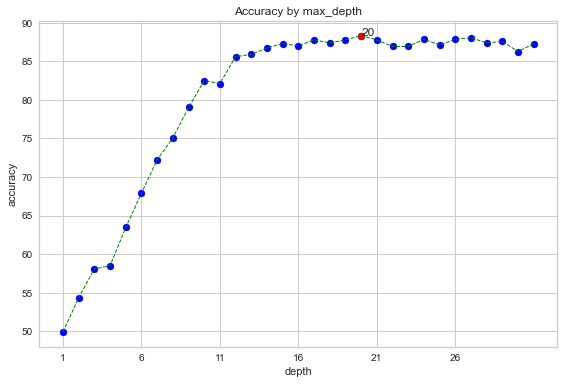

============================Find best max_depth==================================
Best criterion: gini
Best accuracy: 87.29


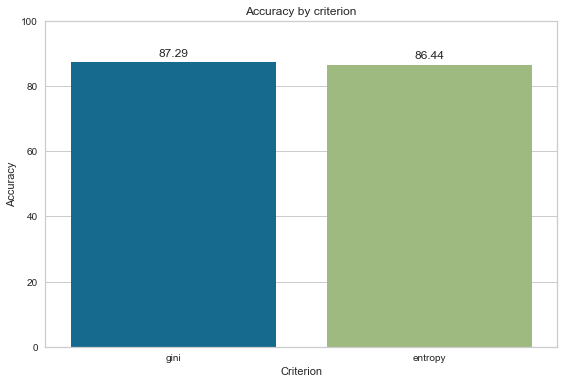

============================Find best criterion==================================
Best n: 180
Best accuracy: 88.70056497175142


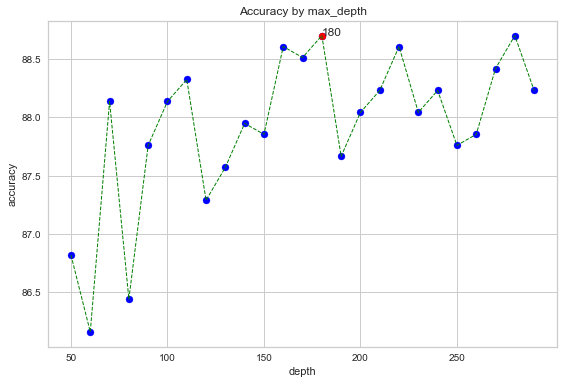

In [36]:
# select the best parameter for RF
rf_depth = rf_select_best_depth()
print("============================Find best max_depth==================================")
rf_criterion = rf_select_best_criterion(rf_depth)
print("============================Find best criterion==================================")
rf_n = rf_select_best_n(rf_depth,rf_criterion)

Best kernel: poly
Best accuracy: 64.97


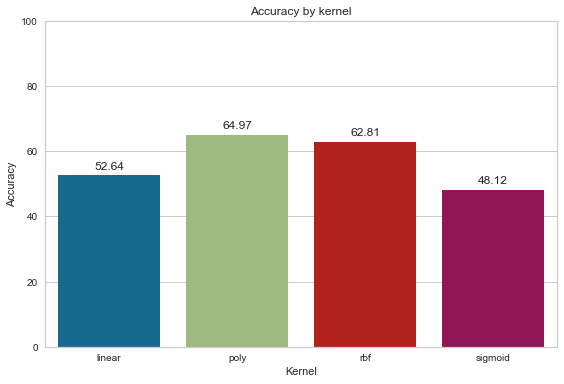

Best kernel: scale
Best accuracy: 64.97


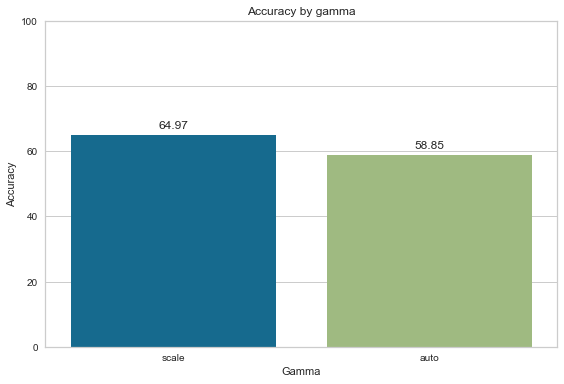

Best degree: 9
Best accuracy: 76.37


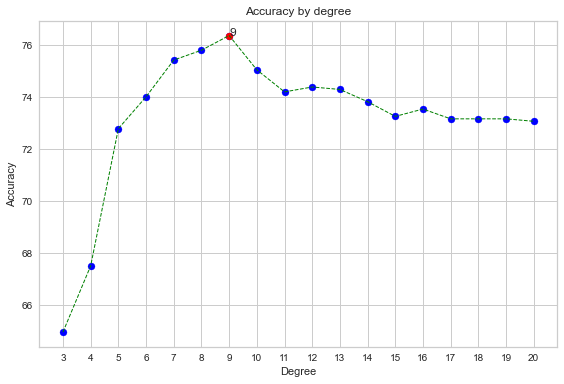

In [37]:
# select the best parameter for SVC
svc_kernel = svc_select_best_kernel()
print("==============================================================")
svc_gamma = svc_select_best_gamma(svc_kernel)
svc_degree = 3 #default, in case the gamma selected is not 'poly'
if svc_kernel == 'poly':
    print("==============================================================")
    svc_degree = svc_select_best_degree(svc_kernel,svc_gamma)

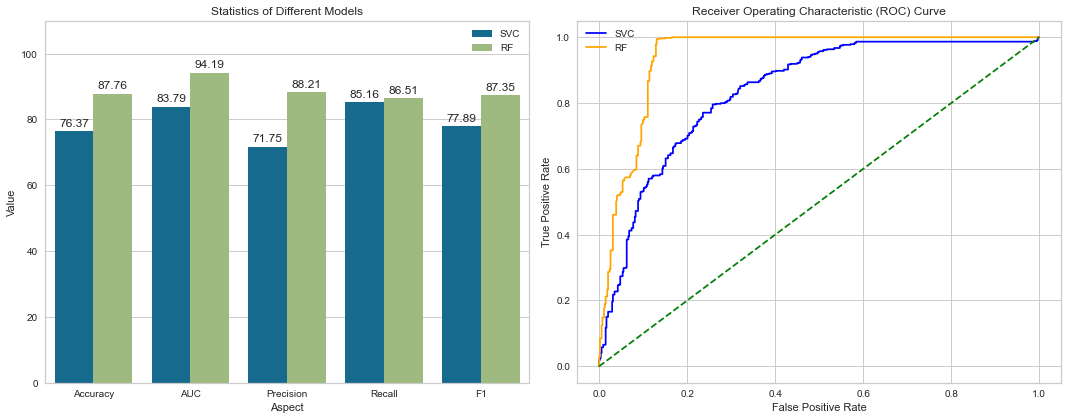

In [38]:
svc = SVC(probability=True,kernel=svc_kernel,gamma=svc_gamma,degree=svc_degree)
svc.fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=rf_depth,criterion=rf_criterion,n_estimators=rf_n)
rf.fit(X_train, y_train)

evaluate_and_plot([svc,rf])

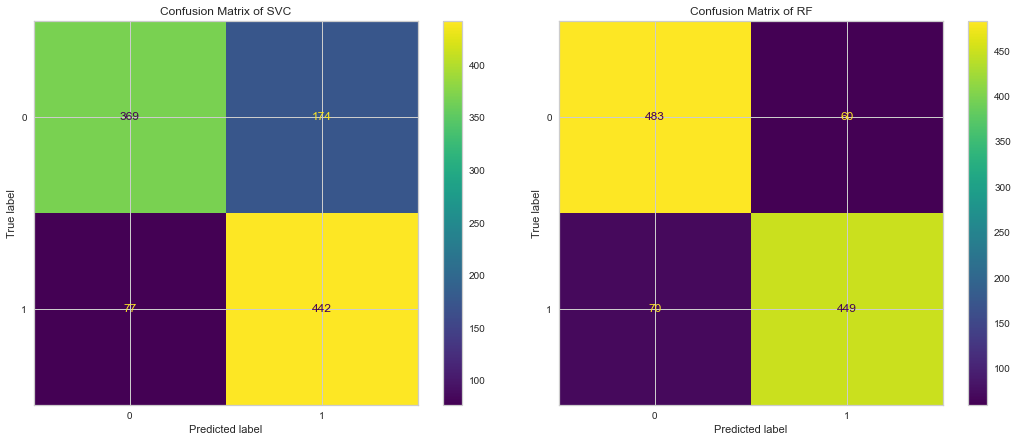

In [39]:
confusion_matrix_graph(svc,rf)